Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=284.598, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=286.152, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=286.239, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=282.778, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=285.758, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.366 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -140.389
Date:                Wed, 22 Nov 2023   AIC                            282.778
Time:                        19:15:02   BIC                            285.373
Sample:                    01-01-2023   HQIC                           283.828
                    

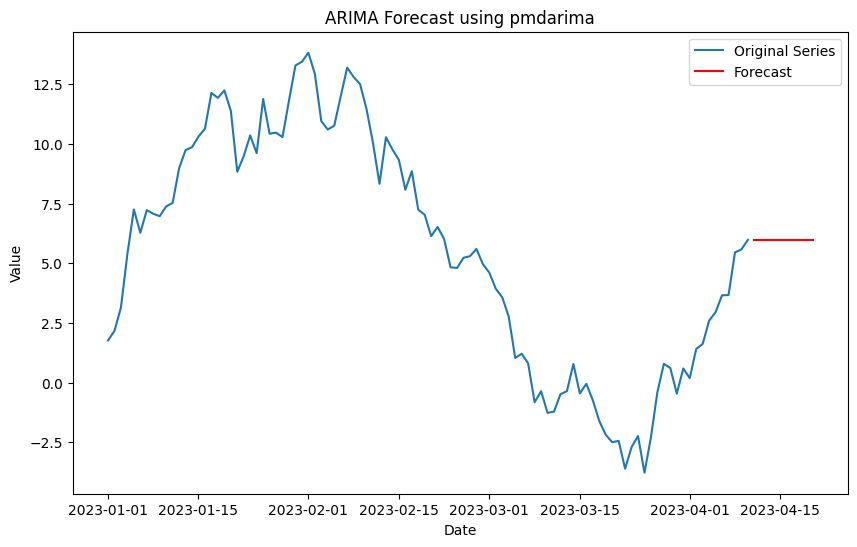

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Generate or load your time series data
# For example, creating a synthetic time series
np.random.seed(0)
date_range = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100).cumsum()  # Generating random data for demonstration
time_series = pd.Series(values, index=date_range)

# Fit ARIMA model using auto_arima
# You can let auto_arima determine the best parameters
# set seasonal = true is data has seasonality 
# you can also manually set limits for (p,d,q,s)
# more here 
#https://pypi.org/project/pmdarima/
model = auto_arima(time_series, seasonal=False, trace=True)

# Summary of the ARIMA model
print(model.summary())

# Forecast future values
forecast_steps = 10
forecast = model.predict(n_periods=forecast_steps)

# Plotting the original series and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Original Series')
plt.plot(date_range[-1] + pd.to_timedelta(np.arange(1, forecast_steps + 1), unit='D'), forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast using pmdarima')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()